In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Charger tous les fichiers
df_data = pd.read_csv("../data/EdStatsData.csv")
df_country = pd.read_csv("../data/EdStatsCountry.csv")
df_country_series = pd.read_csv("../data/EdStatsCountry-Series.csv")
df_series = pd.read_csv("../data/EdStatsSeries.csv")
df_footnote = pd.read_csv("../data/EdStatsFootNote.csv")

In [2]:
# Afficher la taille de chaque dataset
print("Taille Data:", df_data.shape)
print("Taille Country:", df_country.shape)
print("Taille Country-Series:", df_country_series.shape)
print("Taille Series:", df_series.shape)
print("Taille FootNote:", df_footnote.shape)

Taille Data: (886930, 70)
Taille Country: (241, 32)
Taille Country-Series: (613, 4)
Taille Series: (3665, 21)
Taille FootNote: (643638, 5)


# 5 PREMIERES LIGNES DE CHAQUE DATASETS

In [3]:
# Affichage 5 premieres lignes du df data
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Affichage 5 premieres lignes du df country
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
# Affichage 5 premieres lignes du df country_series
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
# Affichage 5 premieres lignes du df series
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Affichage 5 premieres lignes du df footnote
df_footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


# EDA pour df data

In [8]:
# Affichage 10 premieres lignes du df data
df_data.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Describe df_data avec les colonnes en ligne pour une meilleure lisibilité
df_data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,886930,242,Arab World,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,886930,242,ARB,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Name,886930,3665,"Adjusted net enrolment rate, lower secondary, ...",242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator Code,886930,3665,UIS.NERA.2,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,72288.0,NaN,NaN,NaN,1974772449.585474,121168685351.943085,-1.435564,0.89,6.317724,62.5125,19039286948196.101562
...,...,...,...,...,...,...,...,...,...,...,...
2085,51436.0,NaN,NaN,NaN,717.68987,24965.865778,-0.78,0.01,0.23,6.08,3337871.21
2090,51436.0,NaN,NaN,NaN,711.307183,25301.826635,-0.65,0.01,0.23,5.4625,3354746.27
2095,51436.0,NaN,NaN,NaN,703.42738,25560.691226,-0.55,0.01,0.23,4.68,3351886.89
2100,51436.0,NaN,NaN,NaN,694.029624,25741.892898,-0.45,0.01,0.22,4.0325,3330483.54


In [10]:
# Afficher la taille de chaque dataset
print("Taille Data:", df_data.shape) 

Taille Data: (886930, 70)


- 242 noms de pays pour 242 codes de pays ; c'est bon signe
- Idem avec les noms des indicateurs et leurs codes (3665)
- On compte 197 pays dans le monde (Source ONU - 2025) il y a donc une piste à creuser... 
- La colonne Unnamed:69 qui ne contient aucune valeur (probablement dû à un espace ou une virgule sur le fichier) donc à nettoyer.

- Nous avons chaque année jusque 2017 puis à partir de 2020 c'est de 5 ans en 5 ans jusque 2100... 
- Il sera intéressant de voir ce qui se passe s'il y a de la data manquante et à partir d'où 

In [11]:
df_data.info

<bound method DataFrame.info of        Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 y

In [12]:
print(df_data.duplicated().sum())

0


- Pas de doublons

In [13]:
missing_pct = (df_data.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_data = missing_pct.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_data.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_data)


           Colonne  Taux de valeurs manquantes (%)
0     Country Name                            0.00
1     Country Code                            0.00
2   Indicator Name                            0.00
3   Indicator Code                            0.00
4             1970                           91.85
..             ...                             ...
65            2085                           94.20
66            2090                           94.20
67            2095                           94.20
68            2100                           94.20
69     Unnamed: 69                          100.00

[70 rows x 2 columns]


# EDA pour Country

In [14]:
# Affichage 5 premieres lignes du df Country
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [15]:
# Describe df_country
df_country.describe(include="all")

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
count,241,241,241,241,238,215,145,214,214,240,...,181,213,141,160,111,142,107.000000,185.000000,179,0.0
unique,241,241,241,241,238,152,131,7,5,240,...,2,27,60,75,2,35,NaN,NaN,20,NaN
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,NaN,NaN,2000,NaN
freq,1,1,1,1,1,23,6,57,55,1,...,110,59,10,15,110,36,NaN,NaN,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008.102804,2010.994595,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.616834,2.569675,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2007.500000,2011.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,2012.000000,NaN,NaN


In [16]:
# Afficher la taille du dataset Country
print("Taille Country:", df_country.shape)

Taille Country: (241, 32)


In [17]:
# Afficher .info du df_country
df_country.info

<bound method DataFrame.info of     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency

In [18]:
# Affichage doublons dans le df_country
print(df_country.duplicated().sum())

0


- Pas de doublons

In [19]:
# Affichage proportion de valeurs manquantes dans le dataset country
missing_pct_country = (df_country.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_data_country = missing_pct_country.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_data_country.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_data_country)

                                              Colonne  \
0                                        Country Code   
1                                          Short Name   
2                                          Table Name   
3                                           Long Name   
4                                        2-alpha code   
5                                       Currency Unit   
6                                       Special Notes   
7                                              Region   
8                                        Income Group   
9                                           WB-2 code   
10                        National accounts base year   
11                   National accounts reference year   
12                                SNA price valuation   
13                                   Lending category   
14                                       Other groups   
15                        System of National Accounts   
16                      Alterna

In [20]:
list_pays = df_country["Table Name"].unique()
print("Liste des pays:", list_pays)

Liste des pays: ['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Channel Islands'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba'
 'Curaçao' 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'East Asia & Pacific'
 'East Asia & Pacific (all income levels)' 'Europe & Central Asia'
 'Europe & Central Asia (all income levels)' 'Ecuador' 'Egypt, Arab Rep.'
 'Euro area' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'European Union'
 'Finland' 'Fiji' 

# EDA Country Series

In [21]:
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [22]:
df_country_series.describe(include="all")

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
count,613,613,613,0.0
unique,211,21,97,NaN
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
freq,18,211,154,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


In [23]:
# Afficher .info du df_country_series
df_country_series.info

<bound method DataFrame.info of     CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statisti

In [24]:
# Affichage doublons dans le df_country_series
print(df_country_series.duplicated().sum())

0


In [25]:
# Affichage proportion de valeurs manquantes dans le dataset country_series
missing_pct_country_series = (df_country_series.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_country_series = missing_pct_country_series.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_country_series.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_country_series)

       Colonne  Taux de valeurs manquantes (%)
0  CountryCode                             0.0
1   SeriesCode                             0.0
2  DESCRIPTION                             0.0
3   Unnamed: 3                           100.0


# EDA Series

In [26]:
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_series.describe(include="all")

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Afficher .info du df_series
df_series.info

<bound method DataFrame.info of                       Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
.

In [29]:
# Affichage doublons dans le df_series
print(df_series.duplicated().sum())

0


In [30]:
# Affichage proportion de valeurs manquantes dans le dataset series
missing_pct_series = (df_series.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_series = missing_pct_series.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_series.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_series)

                                Colonne  Taux de valeurs manquantes (%)
0                           Series Code                            0.00
1                                 Topic                            0.00
2                        Indicator Name                            0.00
3                      Short definition                           41.17
4                       Long definition                            0.00
5                       Unit of measure                          100.00
6                           Periodicity                           97.30
7                           Base Period                           91.43
8                           Other notes                           84.94
9                    Aggregation method                           98.72
10           Limitations and exceptions                           99.62
11           Notes from original source                          100.00
12                     General comments                         

# EDA Footnote

In [31]:
df_footnote.head(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [32]:
df_footnote.describe(include="all")

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
count,643638,643638,643638,643638,0.0
unique,239,1558,56,9102,NaN
top,LIC,SH.DYN.MORT,YR2004,Country Data,NaN
freq,7320,9226,27128,191188,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [33]:
# Afficher .info du df_series
df_footnote.info

<bound method DataFrame.info of        CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...   

In [34]:
# Affichage doublons dans le df_series
print(df_footnote.duplicated().sum())

0


In [35]:
# Affichage proportion de valeurs manquantes dans le dataset footnote
missing_pct_footnote = (df_footnote.isnull().mean() * 100).round(2) #Proportion de valeurs manquantes dans le dataset data  
missing_df_footnote = missing_pct_footnote.reset_index() #Creation d'un DataFrame avec les valeurs manquantes
missing_df_footnote.columns = ['Colonne', 'Taux de valeurs manquantes (%)'] # Affichage des valeurs manquantes
print(missing_df_footnote)

       Colonne  Taux de valeurs manquantes (%)
0  CountryCode                             0.0
1   SeriesCode                             0.0
2         Year                             0.0
3  DESCRIPTION                             0.0
4   Unnamed: 4                           100.0


# Affichage des doublons

In [36]:
# Affichage des doublons dans les 5 datasets
print("Doublons dans df_data:", df_data.duplicated().sum())
print("Doublons dans df_country:", df_country.duplicated().sum())
print("Doublons dans df_country_series:", df_country_series.duplicated().sum()) 
print("Doublons dans df_series:", df_series.duplicated().sum())
print("Doublons dans df_footnote:", df_footnote.duplicated().sum()) 

Doublons dans df_data: 0
Doublons dans df_country: 0
Doublons dans df_country_series: 0
Doublons dans df_series: 0
Doublons dans df_footnote: 0


# Analyse et visualisation avec missingno 

## Dataset Data

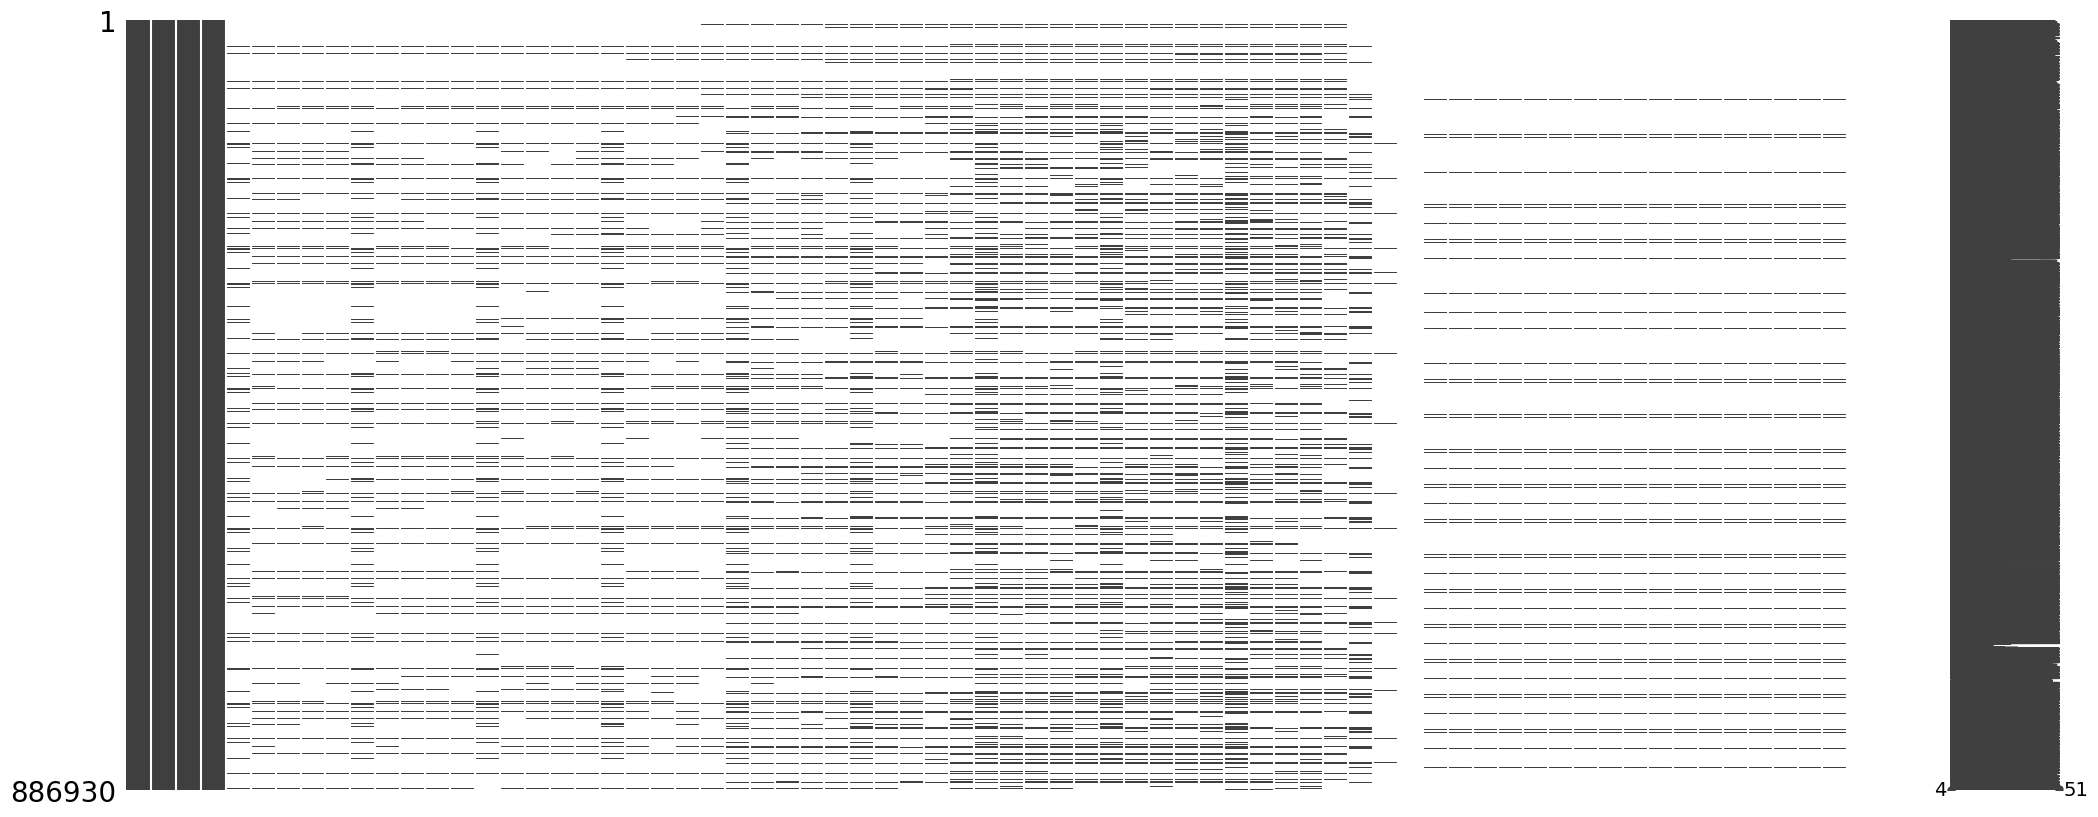

In [37]:
# Matrice des valeurs manquantes
msno.matrix(df_data)
plt.show()

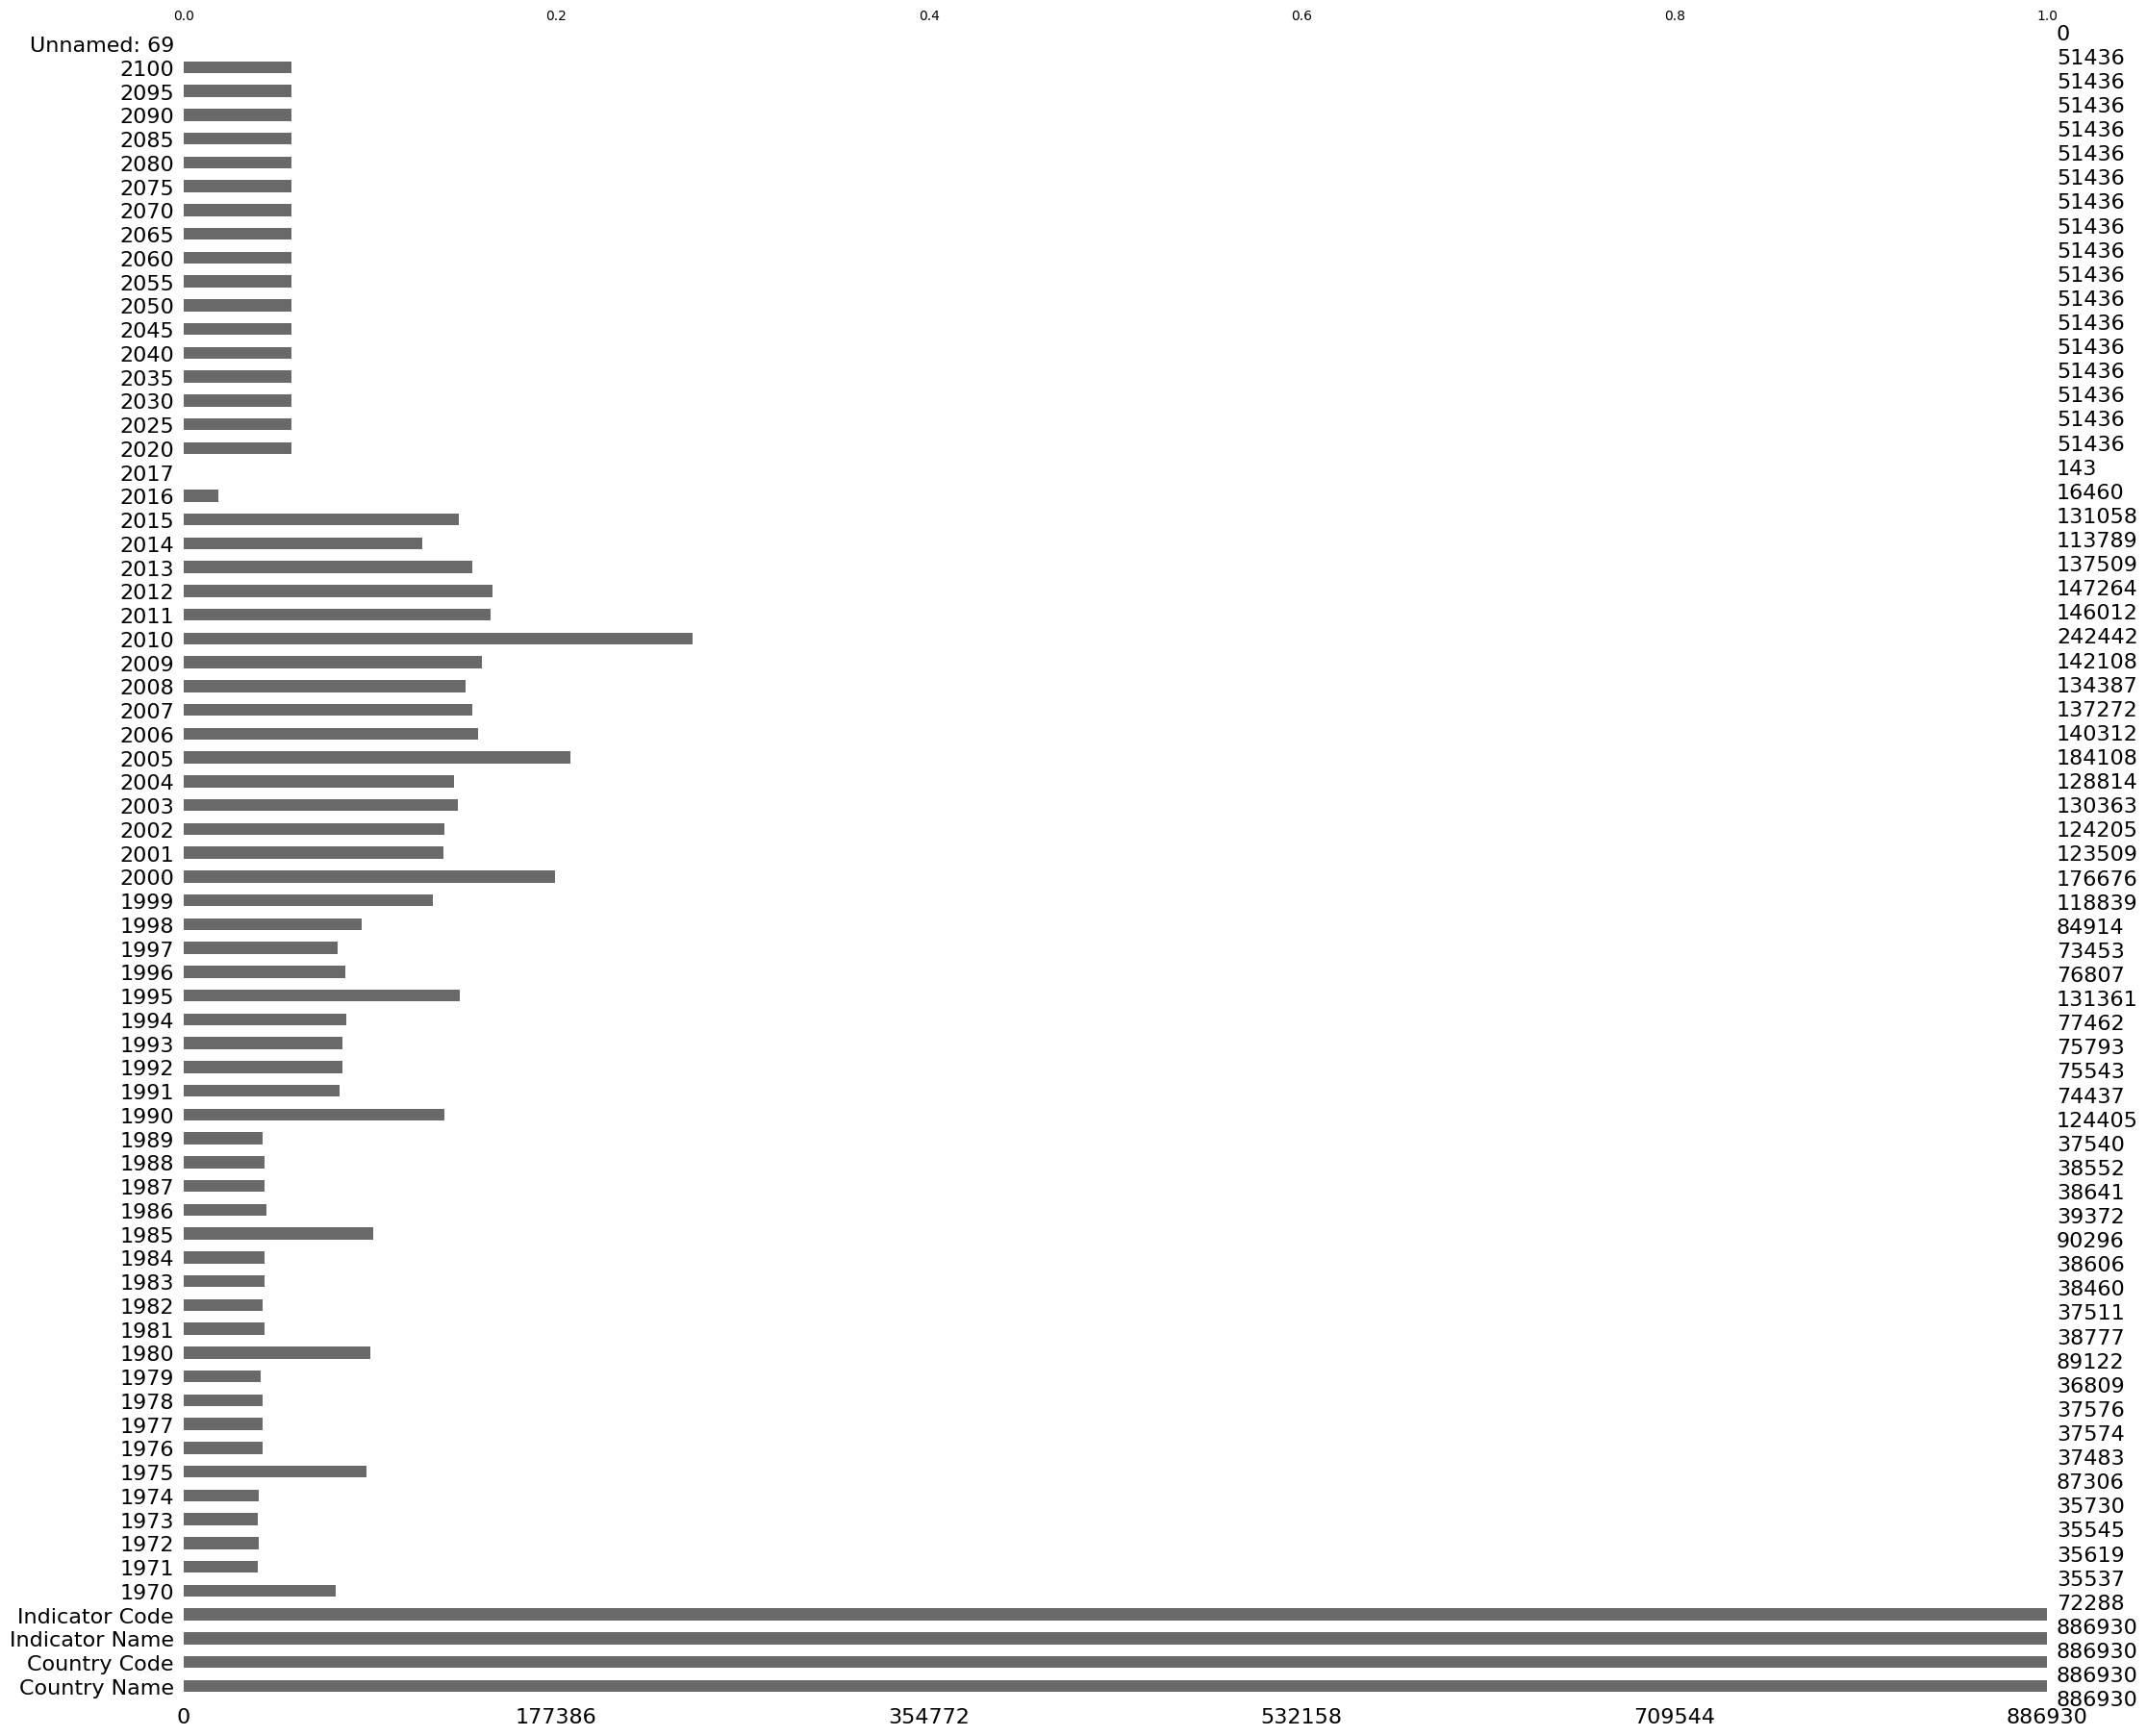

In [38]:
# Barres par colonne
msno.bar(df_data)
plt.show()

## Dataset Country

## Dataset Country_series

## Dataset Series

## Dataset Footnote

## Suppression des colonnes vides pour chaque dataset

In [39]:
#Rappel dimension des datasets
print("Taille Data:", df_data.shape)
print("Taille Country:", df_country.shape)
print("Taille Country-Series:", df_country_series.shape)
print("Taille Series:", df_series.shape)
print("Taille FootNote:", df_footnote.shape)

Taille Data: (886930, 70)
Taille Country: (241, 32)
Taille Country-Series: (613, 4)
Taille Series: (3665, 21)
Taille FootNote: (643638, 5)


In [40]:
# Suppression des colonnes vides pour chaque dataset
df_data = df_data.dropna(axis=1, how='all')
df_country = df_country.dropna(axis=1, how='all')
df_country_series = df_country_series.dropna(axis=1, how='all')
df_series = df_series.dropna(axis=1, how='all')
df_footnote = df_footnote.dropna(axis=1, how='all')

In [41]:
# Contrôle avec .shape()
print("Taille Data après suppression des colonnes vides:", df_data.shape)
print("Taille Country après suppression des colonnes vides:", df_country.shape)
print("Taille Country-Series après suppression des colonnes vides:", df_country_series.shape)
print("Taille Series après suppression des colonnes vides:", df_series.shape)
print("Taille FootNote après suppression des colonnes vides:", df_footnote.shape)  


Taille Data après suppression des colonnes vides: (886930, 69)
Taille Country après suppression des colonnes vides: (241, 31)
Taille Country-Series après suppression des colonnes vides: (613, 3)
Taille Series après suppression des colonnes vides: (3665, 15)
Taille FootNote après suppression des colonnes vides: (643638, 4)


## Vérif des types pour chaque dataset

### Vérif dataset data

In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Vérif des types pour df_data 
df_data_types = df_data.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_data types :")
print(df_data_types)

📊 df_data types :
           colonne     type
0     Country Name   object
1     Country Code   object
2   Indicator Name   object
3   Indicator Code   object
4             1970  float64
5             1971  float64
6             1972  float64
7             1973  float64
8             1974  float64
9             1975  float64
10            1976  float64
11            1977  float64
12            1978  float64
13            1979  float64
14            1980  float64
15            1981  float64
16            1982  float64
17            1983  float64
18            1984  float64
19            1985  float64
20            1986  float64
21            1987  float64
22            1988  float64
23            1989  float64
24            1990  float64
25            1991  float64
26            1992  float64
27            1993  float64
28            1994  float64
29            1995  float64
30            1996  float64
31            1997  float64
32            1998  float64
33            1999  float64
34

In [43]:
df_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Types cohérents avec les colonnes**

### Vérif dataset country

In [44]:
# Vérif des types pour df_country
df_country_types = df_country.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_country types :")
print(df_country_types)
print("\n")

📊 df_country types :
                                              colonne     type
0                                        Country Code   object
1                                          Short Name   object
2                                          Table Name   object
3                                           Long Name   object
4                                        2-alpha code   object
5                                       Currency Unit   object
6                                       Special Notes   object
7                                              Region   object
8                                        Income Group   object
9                                           WB-2 code   object
10                        National accounts base year   object
11                   National accounts reference year  float64
12                                SNA price valuation   object
13                                   Lending category   object
14                                

In [45]:
df_country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


**⚠️ Anomalies au niveau des années :** 
- Il y a 4 colonnes avec des années en float (National accounts reference year , Latest industrial data, Latest trade data) et en object (Latest water withdrawal data) or ça devrait être des nombres entiers (int)
- D'autres colonnes comme National accounts base year sont de type "object" avec des valeurs comme "2002/03" ou "Original chained constant price data are" 

### Vérif dataset Country Series

In [46]:
# Vérif des types pour df_country_series
df_country_series_types = df_country_series.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_country_series types :")
print(df_country_series_types)
print("\n")

📊 df_country_series types :
       colonne    type
0  CountryCode  object
1   SeriesCode  object
2  DESCRIPTION  object




In [47]:
df_country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


- **Types cohérents avec les colonnes**

- **⚠️ Il y aura un travail d'harmonisation des noms de colonne (ici 'CountryCode' mais 'Country Code' dans les df Data et Country)**

- **Idem avec Series Code**

### Vérif dataset Series

In [48]:
# Vérif des types pour df_series
df_series_types = df_series.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_series types :")
print(df_series_types)
print("\n")

📊 df_series types :
                                colonne    type
0                           Series Code  object
1                                 Topic  object
2                        Indicator Name  object
3                      Short definition  object
4                       Long definition  object
5                           Periodicity  object
6                           Base Period  object
7                           Other notes  object
8                    Aggregation method  object
9            Limitations and exceptions  object
10                     General comments  object
11                               Source  object
12  Statistical concept and methodology  object
13                Development relevance  object
14                 Related source links  object




In [49]:
df_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN


- **Types cohérents avec les colonnes**

### Vérif dataset Footnote

In [50]:
# Vérif des types pour df_footnote
df_footnote_types = df_footnote.dtypes.reset_index().rename(columns={"index": "colonne", 0: "type"})
print("📊 df_footnote types :")
print(df_footnote_types)

📊 df_footnote types :
       colonne    type
0  CountryCode  object
1   SeriesCode  object
2         Year  object
3  DESCRIPTION  object


In [51]:
df_footnote.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [52]:
df_footnote['Year'].unique()


array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [53]:
len(df_footnote['Year'].unique())

56

- **La colonne Year devrait contenir un int**
- **Préfixe YR à supprimer**

In [54]:
df_footnote = df_footnote.copy()

# Étape 1 : tout mettre en majuscules
df_footnote['Year'] = df_footnote['Year'].str.upper()

# Étape 2 : retirer le préfixe 'YR'
df_footnote['Year'] = df_footnote['Year'].str.replace('YR', '', regex=False)

# Étape 3 : convertir en entier
df_footnote['Year'] = df_footnote['Year'].astype('Int64')


In [55]:
df_footnote['Year'].unique()

<IntegerArray>
[2001, 2005, 2000, 2004, 2006, 2003, 1999, 2008, 2002, 2007, 2017, 2010, 2009,
 2011, 2012, 2015, 2014, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2013, 2016, 2020, 2025, 2030, 2035,
 2040, 2045, 2050]
Length: 55, dtype: Int64

In [56]:
#Contrôle 
print("📊 df_footnote types :")
print(df_footnote.dtypes)

📊 df_footnote types :
CountryCode    object
SeriesCode     object
Year            Int64
DESCRIPTION    object
dtype: object


# Harmonisation des colonnes en snake_case

In [57]:
def to_snake_case(col):
    col = re.sub(r'[\s\-]+', '_', col)
    col = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', col)
    return col.strip().lower()

dataframes = [df_data, df_country, df_country_series, df_series, df_footnote]
df_names = ['df_data', 'df_country', 'df_country_series', 'df_series', 'df_footnote']

for df, name in zip(dataframes, df_names):
    df.columns = [to_snake_case(col) for col in df.columns]
    print(f"{name} colonnes transformées en snake_case.")


df_data colonnes transformées en snake_case.
df_country colonnes transformées en snake_case.
df_country_series colonnes transformées en snake_case.
df_series colonnes transformées en snake_case.
df_footnote colonnes transformées en snake_case.


In [58]:
#Contrôle
df_country_series.head(5)

,country_code,series_code,description
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
